In [269]:
# This code will implement a baseline, very simple, Perceptron with the hope to make it more complex in the future

In [357]:
import numpy as np 
import matplotlib.pyplot as plt

In [358]:
# Very simple neural network that works on classifying things from the wheat and seeds dataset 
"""In general there are X stages we go through to make a fully functional neural network:
1) Initialise the network 
2) Forward Propagate
3) Back Propagate the error
4) Train Network (i.e. update the weights with training data)
5) Predict on test data
"""


'In general there are X stages we go through to make a fully functional neural network:\n1) Initialise the network \n2) Forward Propagate\n3) Back Propagate the error\n4) Train Network (i.e. update the weights with training data)\n5) Predict on test data\n'

In [359]:
# define input features, 2 input features i.e. 2 input neurons
input_feats = np.array([[0,0],[0,1],[1,0],[1,1]])
print (input_feats.shape)
input_feats


(4, 2)


array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [360]:
# Defining expected outputs
target = np.array([0,1,1,1])
# Ensures 
target = target.reshape(input_feats.shape[0],1)
print (target.shape)
print (target)

(4, 1)
[[0]
 [1]
 [1]
 [1]]


In [361]:
# Create weights 
weights = np.array([[0.1],[0.2]])
print (weights.shape)
weights

(2, 1)


array([[0.1],
       [0.2]])

In [362]:
# Defining bias 
bias = 0.3

In [363]:
# Defining learning rate 
l_rate = 0.05

In [364]:
# Sigmoid activation function 
def sigmoid(X): 
    out = 1/(1+np.exp(-X))
    return out 

In [365]:
# Derivative of sigmoid activation function (used in the gradient descent back propagation)
def sigmoid_der(X):  
    out = sigmoid(X)*(1-sigmoid(X))
    return out

In [401]:
def train(input_feats, weights, bias, target, l_rate, epoch):
    
    cost = np.zeros((epoch,1))
    
    weights_run = weights*2
    bias_run = bias
    
    for epoch in np.arange(0,epoch):
        # Feed forward
        a = np.dot(input_feats,weights_run)+bias_run
        # Pass through activation
        z = sigmoid(a)
        # Calculating cost value for the network 
        cost[epoch] = np.sum((z-target))
        # Calculating the error vector 
        error = z - target
        # Calculating deriv
        deriv = (error * sigmoid_der(z))
        # Calculating dError/dWeights
        dE_dw = np.dot(input_feats.T,deriv)
        # Updating weights 
        weights_run -=(l_rate * dE_dw)
        # Updating bias
        for i in deriv:
            bias_run -= l_rate * i
        
    return cost, weights_run, bias_run

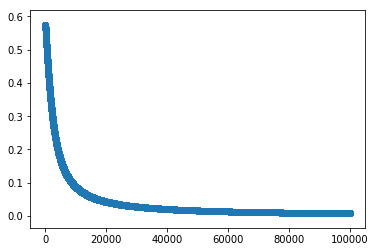

In [402]:
epoch = 100000
epochs = range(epoch)
cost, weights_run , bias_run = train(input_feats, weights, bias, target, 0.005, epoch)
weights_run
plt.scatter(epochs,cost)

In [403]:
print (weights_run)
print (bias_run)

[[16.94132475]
 [16.9414661 ]]
[-4.79079861]


In [404]:
# Testing on data

In [405]:
single_point = np.array([1,0]) # target value = 1

In [406]:
a = np.dot(single_point, weights_run) + bias_run

In [407]:
z = sigmoid(a)
z

array([0.99999471])

In [408]:
single_point = np.array([0,0]) # target value = 0

In [409]:
a = np.dot(single_point, weights_run) + bias_run

In [410]:
z = sigmoid(a)
z

array([0.0082374])